In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Restaurant_Reviews.tsv',sep='\t')

In [3]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df['Review']=df['Review'].str.lower()

In [5]:
df.head()

,Review,Liked
0,wow... loved this place.,1
1,crust is not good.,0
2,not tasty and the texture was just nasty.,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


In [7]:
import string
string.punctuation
exclude=string.punctuation

In [8]:
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
def remove_punc(x):
    for i in exclude:
      x=x.replace(i,' ')
    return x

In [12]:
remove_punc('Hey!!How are you?')

'Hey  How are you '

In [13]:
df['Review']=df['Review'].apply(remove_punc)

In [14]:
df.head()

,Review,Liked
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tf=TfidfVectorizer()
X=tf.fit_transform(df['Review']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
X.shape

(1000, 2035)

In [18]:
Y=df['Liked']

In [19]:
Y=df['Liked']

In [20]:
Y.head()

,Liked
0,1
1,0
2,0
3,1
4,1


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [23]:
xtrain.shape

(800, 2035)

In [24]:
from keras.models import Sequential
from keras.layers import Input,Dense,Dropout
from keras.callbacks import EarlyStopping

In [25]:
model=Sequential()

In [29]:
# Initialize the model
model = Sequential()

# Add input layer
model.add(Input(shape=(xtrain.shape[1],)))

#create dense layer 1
model.add(Dense(units=128,activation='relu'))
#add droupout layers
model.add(Dropout(0.5))
#create dense layer 2
model.add(Dense(units=64,activation='relu'))
#add droupout laye 2
model.add(Dropout(0.4))
#create output layer
model.add(Dense(units=1,activation='sigmoid'))


In [30]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
es=EarlyStopping(monitor='accuracy',patience=2)

In [34]:
hist=model.fit(xtrain,ytrain,validation_split=0.1,epochs=200,callbacks=[es])

Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.6888 - loss: 0.6827 - val_accuracy: 0.8000 - val_loss: 0.6707
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7694 - loss: 0.6569 - val_accuracy: 0.8000 - val_loss: 0.6329
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9029 - loss: 0.5686 - val_accuracy: 0.7625 - val_loss: 0.5406
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9415 - loss: 0.4035 - val_accuracy: 0.8000 - val_loss: 0.4298
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9530 - loss: 0.2282 - val_accuracy: 0.7750 - val_loss: 0.3917
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9866 - loss: 0.1103 - val_accuracy: 0.8250 - val_loss: 0.3474
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9917 - loss: 0.0722 - val_accuracy: 0.8125 - val_loss: 0.3465
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9820 - loss: 0.0564 - val_accuracy: 0.8375 -

In [35]:
yprob_train=model.predict(xtrain)
yprob_test=model.predict(xtest)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


In [36]:
yprob_train[:5]

array([[9.4620436e-01],
       [9.9908066e-01],
       [2.8714631e-04],
       [9.9967539e-01],
       [9.9988508e-01]], dtype=float32)

In [37]:
ypred_tr=[]
for i in yprob_train:
  if i>0.5:
    ypred_tr.append(0)
  else:
    ypred_tr.append(1)

In [38]:
ypred_tr[:5]

[0, 0, 1, 0, 0]

In [40]:
ypred_ts=[]
for i in yprob_test:
  if i>0.5:
    ypred_ts.append(0)
  else:
    ypred_ts.append(1)

In [41]:
ytest.head()

,Liked
307,0
739,1
451,1
786,0
854,0


In [42]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

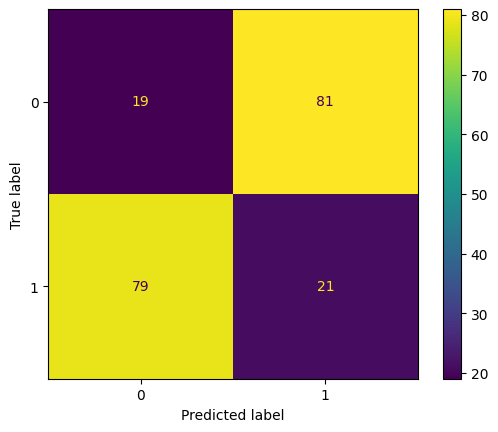

In [43]:
cf=confusion_matrix(ytest,ypred_ts)
cfd=ConfusionMatrixDisplay(cf)
cfd.plot()

In [50]:
st=input('enter your review')
stl=st.lower()
strm=remove_punc(stl)
sttf=tf.transform([strm]).toarray()

enter your reviewi love it


In [51]:
pred=model.predict([sttf])
if pred>0.5:
  print('positive review')
else:
  print('negative review')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
positive review
